In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from clean import clean_dataset

In [2]:
data = pd.read_csv("dataset/heart_2022_with_nans.csv")

In [15]:
print("Initial data shape: ", data.shape)

Initial data shape:  (299285, 42)


### Removing Duplicate Rows


In [16]:
data.drop_duplicates(inplace=True)
print("Data shape after removing duplicates: ", data.shape) 

Data shape after removing duplicates:  (292550, 42)


### Outlier Detection

In [7]:
def sns_plot(numeric_list, data, type):
    features = [col for col in numeric_list if col != 'GeneralHealth']

    n_features = len(features)
    n_cols = 4  # Number of columns in the grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, 5 * n_rows))
    axes = axes.flatten()

    # Loop over the features and create plots
    if type=="box":
        for i, feature in enumerate(features):
            sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
            axes[i].set_title(f"{feature} vs Smoking")
    elif type=="violin":
        for i, feature in enumerate(features):
            sns.violinplot(ax=axes[i], x="smoking", y=feature, data=data, palette="Set2")
            axes[i].set_title(f"{feature} vs Smoking")
    elif type=="histogram":
        for i, feature in enumerate(features):
            sns.histplot(ax=axes[i], x=feature, data=data, hue="smoking", palette="Set2", kde=True)
            axes[i].set_title(f"{feature} vs Smoking")
        

    # Delete any remaining unused axes if number of plots is less than grid size
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

From the box plots we observe that we can remove the
- wage per hour>8,000
- capital gains>80,000
- capital losses>4,000 and 
- dividends from stocks with value >80,000

In [18]:
# def compute_stats(data):
#     print("Means : ")
#     print("Mean Age   = ",np.mean(data['age']))
#     print("Mean Wage per Hour = ",np.mean(data['wage per hour']))
#     print("Mean Capital Gains = ",np.mean(data['capital gains']))   
#     print("Mean Captial Losses = ",np.mean(data['capital losses']))
#     print("Mean Divideneds from stocks = ",np.mean(data['dividends from stocks']))
#     print("Mean number of persons worked for employer = ",np.mean(data['num persons worked for employer']))

#     print("\nMedians : ")   
#     print("Median Age   = ",np.median(data['age']))
#     print("Median Wage per Hour = ",np.median(data['wage per hour']))
#     print("Median Capital Gains = ",np.median(data['capital gains']))   
#     print("Median Captial Losses = ",np.median(data['capital losses']))
#     print("Median Divideneds from stocks = ",np.median(data['dividends from stocks']))
#     print("Median number of persons worked for employer = ",np.median(data['num persons worked for employer']))


#     print("\n Standard deviations : ")  
#     print("Std of Age   = ",np.std(data['age']))
#     print("Std of Wage per Hour = ",np.std(data['wage per hour']))
#     print("Std of Capital Gains = ",np.std(data['capital gains']))   
#     print("Std of Captial Losses = ",np.std(data['capital losses']))
#     print("Std of Divideneds from stocks = ",np.std(data['dividends from stocks']))
#     print("Std of number of persons worked for employer = ",np.std(data['num persons worked for employer']))

    

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


C:\Users\Rahul\AppData\Local\Temp\ipykernel_18352\1342660557.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
C:\Users\Rahul\AppData\Local\Temp\ipykernel_18352\1342660557.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
C:\Users\Rahul\AppData\Local\Temp\ipykernel_18352\1342660557.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2"

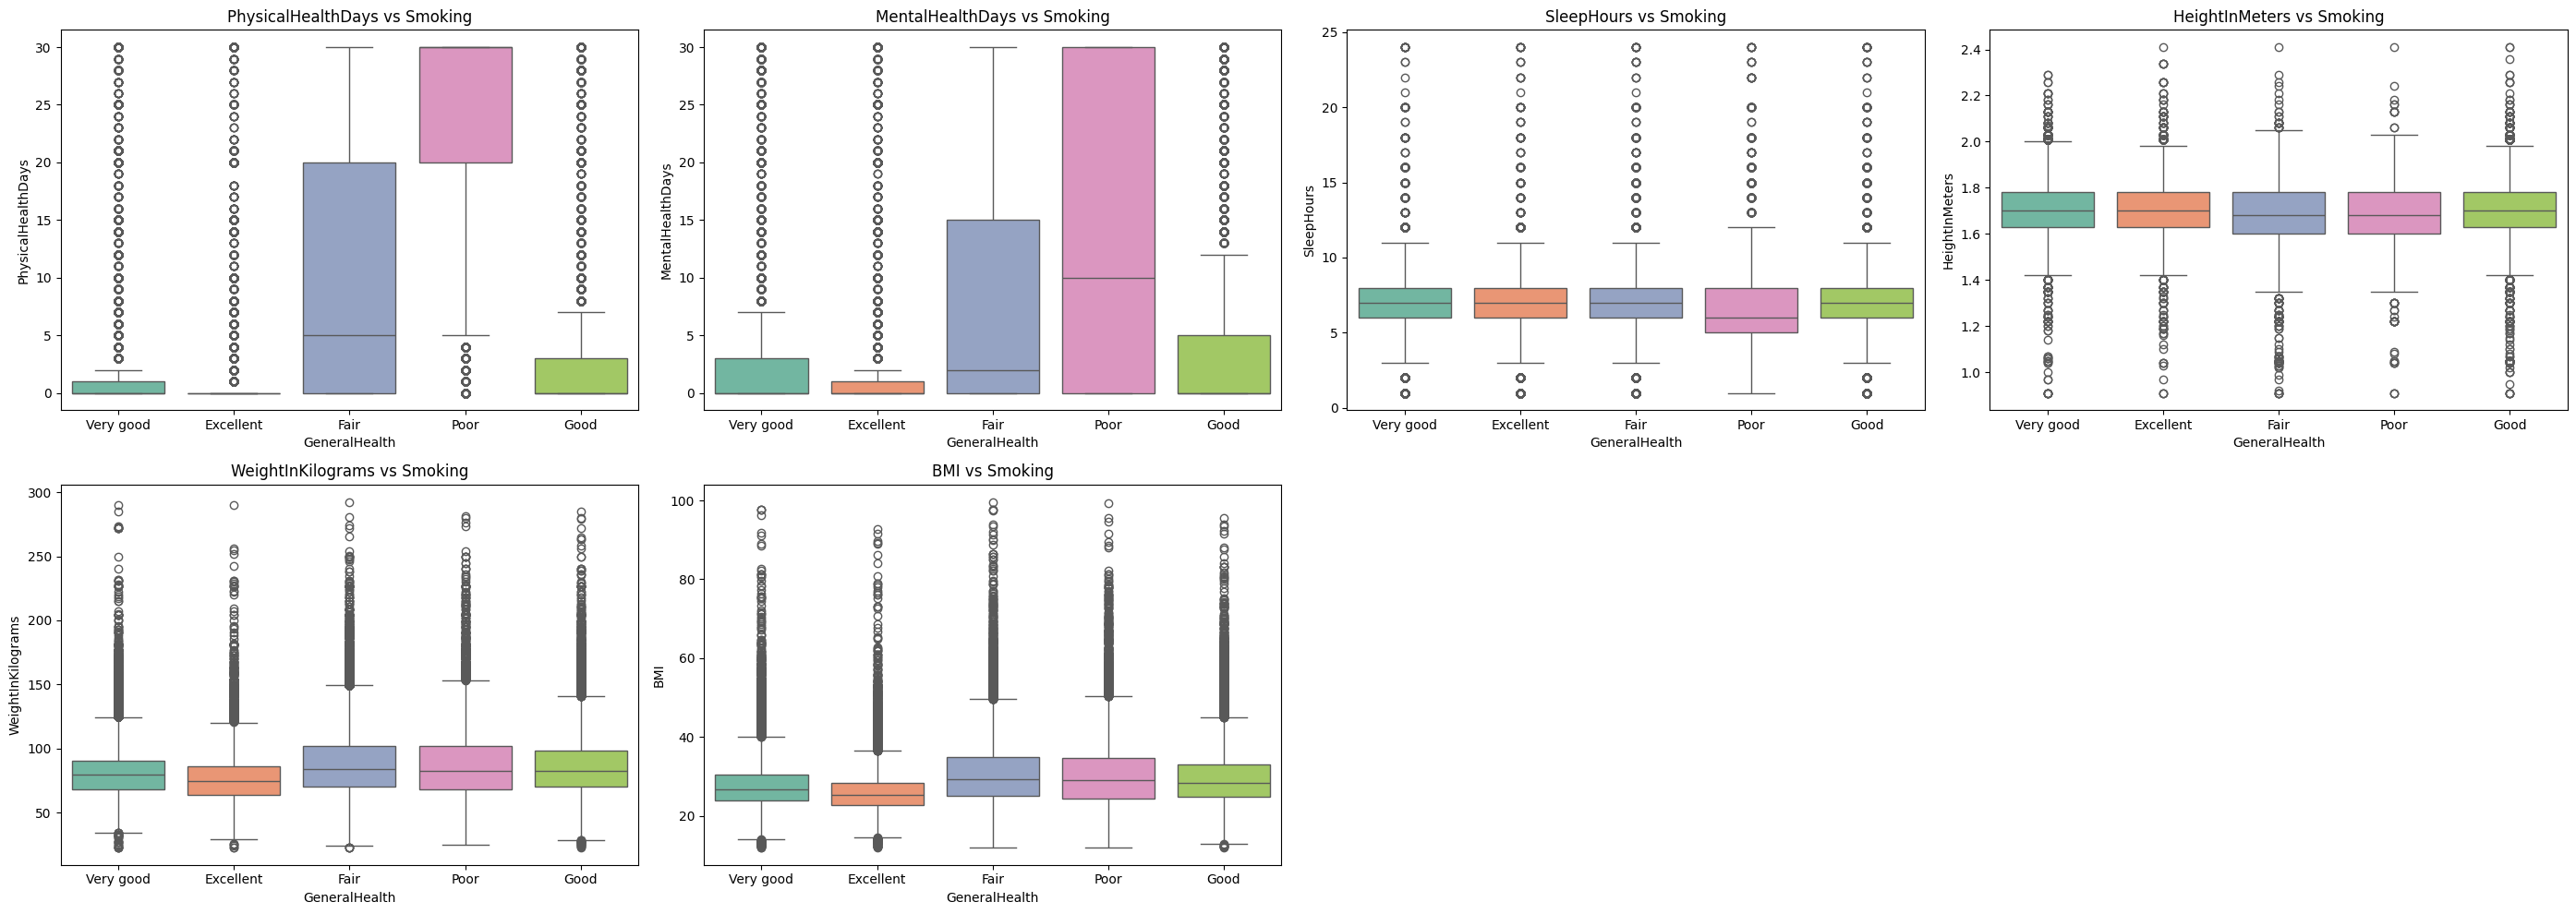

In [8]:
numerical_columns = data.select_dtypes(include=['number']).columns
print(numerical_columns)
sns_plot(numerical_columns, data, "box")

In [20]:
compute_stats(data)

Means : 
Mean Age   =  35.14873696803965
Mean Wage per Hour =  56.369147154332595
Mean Capital Gains =  441.68161681763803
Mean Captial Losses =  37.69733720731499
Mean Divideneds from stocks =  200.32219791488635
Mean number of persons worked for employer =  2.0008477183387456

Medians : 
Median Age   =  34.0
Median Wage per Hour =  0.0
Median Capital Gains =  0.0
Median Captial Losses =  0.0
Median Divideneds from stocks =  0.0
Median number of persons worked for employer =  1.0

 Standard deviations : 
Std of Age   =  22.174936234095224
Std of Wage per Hour =  276.33429037179513
Std of Capital Gains =  4723.754589057041
Std of Captial Losses =  272.8185510581883
Std of Divideneds from stocks =  1959.7084140838117
Std of number of persons worked for employer =  2.3729661494616168


In [30]:
data = clean_dataset(data)

Removing outliers
Data Shape after removing outliers :  (285410, 43)
   94 or 95  age below or above $50k  capital gains  capital losses  \
0        95   73            - 50000.              0               0   
1        94   58            - 50000.              0               0   
2        95   18            - 50000.              0               0   
3        94    9            - 50000.              0               0   
4        94   10            - 50000.              0               0   

                            citizenship                  class of worker  \
0     Native- Born in the United States                  Not in universe   
1     Native- Born in the United States   Self-employed-not incorporated   
2   Foreign born- Not a citizen of U S                   Not in universe   
3     Native- Born in the United States                  Not in universe   
4     Native- Born in the United States                  Not in universe   

  country of birth father country of birth moth

In [31]:
data.shape

(285410, 43)

In [32]:
compute_stats(data)

Means : 
Mean Age   =  34.638590098454856
Mean Wage per Hour =  55.26861357345573
Mean Capital Gains =  145.10325847027084
Mean Captial Losses =  35.195837567008866
Mean Divideneds from stocks =  40.49672050734032
Mean number of persons worked for employer =  1.989429242142882

Medians : 
Median Age   =  33.0
Median Wage per Hour =  0.0
Median Capital Gains =  0.0
Median Captial Losses =  0.0
Median Divideneds from stocks =  0.0
Median number of persons worked for employer =  1.0

 Standard deviations : 
Std of Age   =  22.07309910513625
Std of Wage per Hour =  255.11049277763107
Std of Capital Gains =  977.043198816562
Std of Captial Losses =  258.4130559665546
Std of Divideneds from stocks =  211.37470233925032
Std of number of persons worked for employer =  2.370075158300901


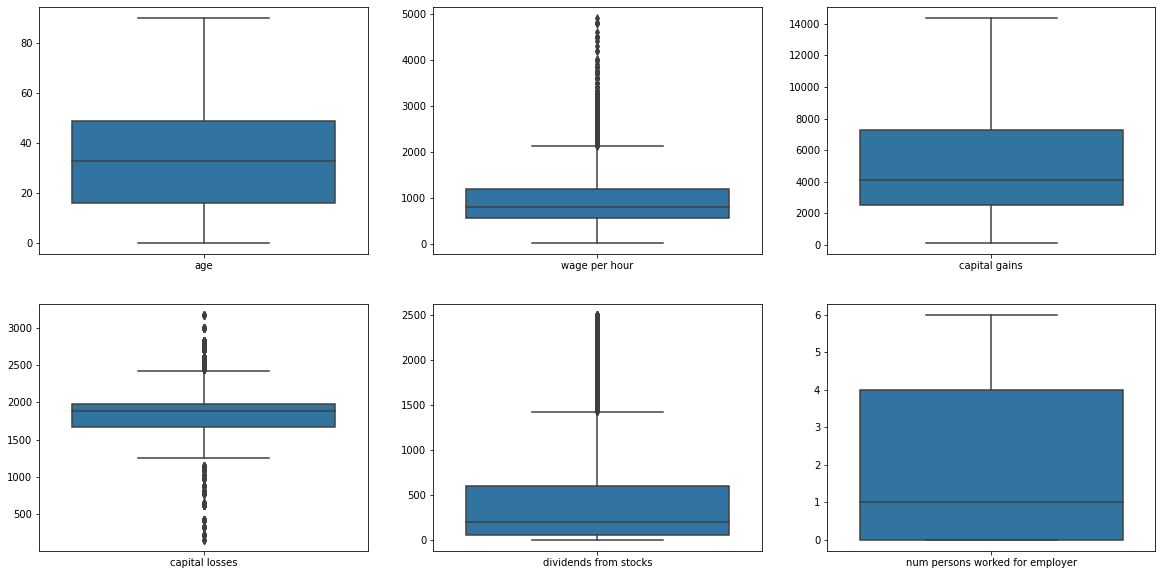

In [33]:
create_box_plot(data)

Observation either loss or gain not both

In [34]:
def plot_histogram(data):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    ax[0,0].hist(data['age'], edgecolor='black',bins=20)
    ax[0,0].set_xlabel('Age')
    ax[0,0].set_ylabel('Frequency')
    ax[0,1].hist(data['wage per hour'],edgecolor='black', bins=20)
    ax[0,1].set_xlabel('Wage Per Hour')
    ax[0,1].set_ylabel('Frequency')
    ax[0,2].hist(data['capital gains'], edgecolor='black',bins=20)
    ax[0,2].set_xlabel('Capital Gains')
    ax[0,2].set_ylabel('Frequency') 
    ax[1,0].hist(data['capital losses'],edgecolor='black', bins=20)
    ax[1,0].set_xlabel('Capital Losses')
    ax[1,0].set_ylabel('Frequency') 
    ax[1,1].hist(data['dividends from stocks'], edgecolor='black',bins=20)
    ax[1,1].set_xlabel('Dividends from Stocks')
    ax[1,1].set_ylabel('Frequency') 
    ax[1,2].hist(data['num persons worked for employer'], edgecolor='black',bins=20)
    ax[1,2].set_xlabel('Number of Persons Worked for Employer') 
    ax[1,2].set_ylabel('Frequency')
    plt.show()

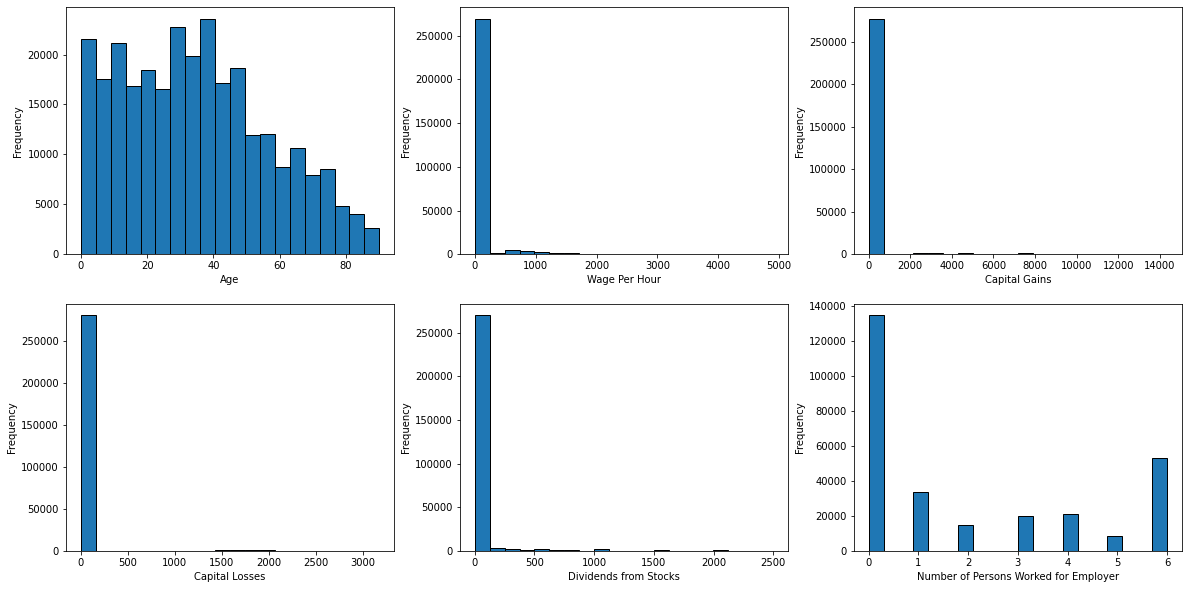

In [35]:
plot_histogram(data)

Based on this, we observe that the majority of the values of the Dividends from Stocks, Wages Per Hour, Capital Gains and Capital Losses are 0, hence, what we do is:-
- We drop the Dividends from Stocks and Wage Per Hour columns 
- We combined the Capital Gains and Capital Losses columns together to create a column for net capital.

In [36]:
data['net_capital'] = data['capital gains'] - data['capital losses']
data.shape

(285410, 43)

### Scatter Plot 

In [37]:
def scatter_plot(data):
    fig, ax = plt.subplots(5,5, figsize=(20, 10))
    ax[0,0].scatter(data['age'], data['wage per hour'])
    ax[0,1].scatter(data['age'], data['capital gains'])
    ax[0,2].scatter(data['age'], data['capital losses'])
    ax[0,3].scatter(data['age'], data['dividends from stocks'])
    ax[0,4].scatter(data['age'], data['num persons worked for employer'])
    
    ax[1,0].scatter(data['wage per hour'], data['age'])
    ax[1,1].scatter(data['wage per hour'], data['capital gains'])
    ax[1,2].scatter(data['wage per hour'], data['capital losses'])
    ax[1,3].scatter(data['wage per hour'], data['dividends from stocks'])
    ax[1,4].scatter(data['wage per hour'], data['num persons worked for employer'])

    ax[2,0].scatter(data['net capital'], data['age'])
    ax[2,1].scatter(data['net capital'], data['wage per hour'])
    ax[2,2].scatter(data['net capital'], data['capital losses'])
    ax[2,3].scatter(data['net capital'], data['dividends from stocks'])
    ax[2,4].scatter(data['net capital'], data['num persons worked for employer'])

    
    ax[2,0].scatter(data['capital gains'], data['age'])
    ax[2,1].scatter(data['capital gains'], data['wage per hour'])
    ax[2,2].scatter(data['capital gains'], data['capital losses'])
    ax[2,3].scatter(data['capital gains'], data['dividends from stocks'])
    ax[2,4].scatter(data['capital gains'], data['num persons worked for employer'])


    plt.show()
    